<a href="https://colab.research.google.com/github/RishabhMehra/Machine-Learning-with-Python-/blob/Data/Classification_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/RishabhMehra/Machine-Learning-with-Python-/main/Data/hr_data.csv'

df = pd.read_csv(url)

In [ ]:
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8995 non-null   object 
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   object 
 10  Candidate relocate actual    8995 non-null   object 
 11  Gender                       8995 non-null   object 
 12  Candidate Source             8995 non-null   object 
 13  Rex in Yrs        

In [ ]:
df['Joining Bonus'].value_counts()

No     8578
Yes     417
Name: Joining Bonus, dtype: int64

In [ ]:
df['Offered band'].value_counts()

E1    5568
E2    2711
E3     505
E0     211
Name: Offered band, dtype: int64

In [ ]:
df.drop('SLNO',axis=1,inplace=True)

In [ ]:
df.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [ ]:
X_features = df.columns.to_list()
X_features= [x for x in X_features if x not in ['Candidate Ref','Status'] ]
X_features

['DOJ Extended',
 'Duration to accept offer',
 'Notice period',
 'Offered band',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Percent difference CTC',
 'Joining Bonus',
 'Candidate relocate actual',
 'Gender',
 'Candidate Source',
 'Rex in Yrs',
 'LOB',
 'Location',
 'Age']

In [ ]:
encoded_df =  pd.get_dummies(df[X_features],drop_first=True)


In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Duration to accept offer            8995 non-null   int64  
 1   Notice period                       8995 non-null   int64  
 2   Pecent hike expected in CTC         8995 non-null   float64
 3   Percent hike offered in CTC         8995 non-null   float64
 4   Percent difference CTC              8995 non-null   float64
 5   Rex in Yrs                          8995 non-null   int64  
 6   Age                                 8995 non-null   int64  
 7   DOJ Extended_Yes                    8995 non-null   uint8  
 8   Offered band_E1                     8995 non-null   uint8  
 9   Offered band_E2                     8995 non-null   uint8  
 10  Offered band_E3                     8995 non-null   uint8  
 11  Joining Bonus_Yes                   8995 no

In [ ]:
df['Status'] = df['Status'].apply(lambda x: 1 if x=='Joined' else 0)

In [ ]:
df['Status'].value_counts()

1    7313
0    1682
Name: Status, dtype: int64

In [ ]:
df.isna().sum()

Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                8995 non-null   int64  
 1   DOJ Extended                 8995 non-null   object 
 2   Duration to accept offer     8995 non-null   int64  
 3   Notice period                8995 non-null   int64  
 4   Offered band                 8995 non-null   object 
 5   Pecent hike expected in CTC  8995 non-null   float64
 6   Percent hike offered in CTC  8995 non-null   float64
 7   Percent difference CTC       8995 non-null   float64
 8   Joining Bonus                8995 non-null   object 
 9   Candidate relocate actual    8995 non-null   object 
 10  Gender                       8995 non-null   object 
 11  Candidate Source             8995 non-null   object 
 12  Rex in Yrs                   8995 non-null   int64  
 13  LOB               

In [ ]:
import seaborn as sns
#plt.figure(figsize=(30,20))
#sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vit_factors(X):
  vif_factors = pd.DataFrame()
  vif_factors['column'] =X.columns
  vif_factors['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif_factors



vif_factors = get_vit_factors(encoded_df)
vif_factors

,column,VIF
0,Duration to accept offer,2.252260
1,Notice period,5.113223
2,Pecent hike expected in CTC,52.897129
3,Percent hike offered in CTC,57.019709
4,Percent difference CTC,14.333705
5,Rex in Yrs,11.568641
6,Age,82.288149
7,DOJ Extended_Yes,2.294047
8,Offered band_E1,31.652216
9,Offered band_E2,18.235493


In [ ]:
#vif_5 = vif_factors['VIF']<5

#vif_factors = vif_factors[vif_5]

  

#sigificant_column= vif_factors.column
#encoded_df.drop(remove_factors,axis=1,inplace=True)

In [ ]:


import statsmodels.api as sm

#encoded_df =encoded_df[sigificant_column]

X = sm.add_constant(encoded_df)
y = df['Status']



print (X.columns)

Index(['const', 'Duration to accept offer', 'Notice period',
       'Pecent hike expected in CTC', 'Percent hike offered in CTC',
       'Percent difference CTC', 'Rex in Yrs', 'Age', 'DOJ Extended_Yes',
       'Offered band_E1', 'Offered band_E2', 'Offered band_E3',
       'Joining Bonus_Yes', 'Candidate relocate actual_Yes', 'Gender_Male',
       'Candidate Source_Direct', 'Candidate Source_Employee Referral',
       'LOB_BFSI', 'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS',
       'LOB_Healthcare', 'LOB_INFRA', 'LOB_MMS', 'Location_Bangalore',
       'Location_Chennai', 'Location_Cochin', 'Location_Gurgaon',
       'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Noida', 'Location_Others', 'Location_Pune'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 50)

In [ ]:
X_train.columns

y_train.value_counts()

1    5101
0    1195
Name: Status, dtype: int64

In [ ]:
X_train.shape

(6296, 35)

In [ ]:
y_train.shape

(6296,)

In [ ]:
y.shape

(8995,)

In [ ]:
X.shape

(8995, 35)

In [ ]:
logist = sm.Logit(y_train,X_train)
logist_model_1 = logist.fit()

         Current function value: 0.418178
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
y_pred_train=logist_model_1.predict(X_train)

In [ ]:
y_pred_train=y_pred_train.apply(lambda x: 1 if x>0.3 else 0)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred_train)
print(cm)

[[   1 1194]
 [   0 5101]]


In [ ]:
logist_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                       Results: Logit
============================================================================================
Model:                        Logit                    Pseudo R-squared:         0.139      
Dependent Variable:           Status                   AIC:                      5335.6987  
Date:                         2021-05-04 03:09         BIC:                      5571.8672  
No. Observations:             6296                     Log-Likelihood:           -2632.8    
Df Model:                     34                       LL-Null:                  -3059.5    
Df Residuals:                 6261                     LLR p-value:              3.1725e-157
Converged:                    0.0000                   Scale:                    1.0000     
No. Iterations:               35.0000                                                       
--------------------------------------------------------------------------------------------
                                    Coef.   Std.Err.     z     P>|z|     [0.025     0.975]  
--------------------------------------------------------------------------------------------
const                              -1.9291     1.3085  -1.4743 0.1404     -4.4936     0.6355
Duration to accept offer           -0.0003     0.0014  -0.2021 0.8398     -0.0030     0.0025
Notice period                      -0.0200     0.0017 -11.9405 0.0000     -0.0232    -0.0167
Pecent hike expected in CTC        -0.0060     0.0042  -1.4496 0.1472     -0.0142     0.0021
Percent hike offered in CTC         0.0070     0.0043   1.6274 0.1036     -0.0014     0.0154
Percent difference CTC             -0.0066     0.0057  -1.1529 0.2490     -0.0178     0.0046
Rex in Yrs                         -0.0190     0.0246  -0.7743 0.4387     -0.0673     0.0292
Age                                 0.0307     0.0111   2.7764 0.0055      0.0090     0.0524
DOJ Extended_Yes                    0.1846     0.0764   2.4175 0.0156      0.0349     0.3342
Offered band_E1                     1.3195     0.2305   5.7251 0.0000      0.8677     1.7712
Offered band_E2                     1.1006     0.2536   4.3392 0.0000      0.6035     1.5978
Offered band_E3                     1.4453     0.3392   4.2604 0.0000      0.7804     2.1101
Joining Bonus_Yes                  -0.2545     0.1676  -1.5183 0.1289     -0.5830     0.0740
Candidate relocate actual_Yes      20.5316  1766.4124   0.0116 0.9907  -3441.5732  3482.6363
Gender_Male                        -0.2221     0.0942  -2.3589 0.0183     -0.4067    -0.0376
Candidate Source_Direct             0.3951     0.0790   5.0023 0.0000      0.2403     0.5499
Candidate Source_Employee Referral  0.8011     0.1164   6.8795 0.0000      0.5729     1.0293
LOB_BFSI                            0.2853     0.1699   1.6796 0.0930     -0.0476     0.6183
LOB_CSMP                            0.1953     0.1932   1.0110 0.3120     -0.1833     0.5740
LOB_EAS                            -0.3106     0.2167  -1.4334 0.1517     -0.7352     0.1141
LOB_ERS                             0.1917     0.1621   1.1832 0.2367     -0.1259     0.5093
LOB_ETS                             0.3265     0.1893   1.7252 0.0845     -0.0444     0.6975
LOB_Healthcare                      0.7659     0.3510   2.1821 0.0291      0.0780     1.4538
LOB_INFRA                           0.8366     0.1752   4.7760 0.0000      0.4933     1.1799
LOB_MMS                            18.9556  5181.9980   0.0037 0.9971 -10137.5739 10175.4851
Location_Bangalore                  1.3572     1.2396   1.0949 0.2736     -1.0723     3.7867
Location_Chennai                    1.2296     1.2382   0.9931 0.3207     -1.1972     3.6564
Location_Cochin                    10.9025   194.9597   0.0559 0.9554   -371.2115   393.0165
Location_Gurgaon                    1.2514     1.2641   0.9900 0.3222     -1.2261     3.7289
Location_Hyderabad                  1.3944     1.2493   1.1161 0.2644     -1.0542   

In [ ]:
def get_significant_vsrs(lm):
  p_values_df = pd.DataFrame(lm.pvalues)
  p_values_df['vars'] = p_values_df.index
  p_values_df.columns = ['pvals','vars']
  return list(p_values_df[p_values_df.pvals<=0.05]['vars'])

In [ ]:
significant_features = get_significant_vsrs(logist_model_1)
significant_features

['Notice period',
 'Age',
 'DOJ Extended_Yes',
 'Offered band_E1',
 'Offered band_E2',
 'Offered band_E3',
 'Gender_Male',
 'Candidate Source_Direct',
 'Candidate Source_Employee Referral',
 'LOB_Healthcare',
 'LOB_INFRA']

In [ ]:
#significant_features.remove('const')

In [ ]:
X = sm.add_constant(encoded_df[significant_features])
y = df['Status']

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 30)

In [ ]:
logist = sm.Logit(y_train,X_train)
logist_model_2 = logist.fit()

Optimization terminated successfully.
         Current function value: 0.452534
         Iterations 6


In [ ]:
logist_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
===================================================================================
Model:                    Logit                  Pseudo R-squared:       0.056     
Dependent Variable:       Status                 AIC:                    5722.3022 
Date:                     2021-05-04 03:10       BIC:                    5803.2743 
No. Observations:         6296                   Log-Likelihood:         -2849.2   
Df Model:                 11                     LL-Null:                -3018.4   
Df Residuals:             6284                   LLR p-value:            6.4547e-66
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           6.0000                                                   
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
const                              -0.0488   0.3384  -0.1442 0.8853 -0.7122  0.6145
Notice period                      -0.0188   0.0015 -12.7100 0.0000 -0.0217 -0.0159
Age                                 0.0306   0.0097   3.1399 0.0017  0.0115  0.0496
DOJ Extended_Yes                    0.1965   0.0686   2.8634 0.0042  0.0620  0.3310
Offered band_E1                     1.0989   0.2254   4.8757 0.0000  0.6571  1.5406
Offered band_E2                     0.7686   0.2321   3.3114 0.0009  0.3137  1.2235
Offered band_E3                     0.9682   0.2815   3.4400 0.0006  0.4166  1.5199
Gender_Male                        -0.1403   0.0921  -1.5230 0.1278 -0.3209  0.0403
Candidate Source_Direct             0.3487   0.0745   4.6771 0.0000  0.2026  0.4948
Candidate Source_Employee Referral  0.6370   0.1111   5.7333 0.0000  0.4192  0.8548
LOB_Healthcare                      0.0719   0.2773   0.2593 0.7954 -0.4717  0.6155
LOB_INFRA                           0.7267   0.0941   7.7197 0.0000  0.5422  0.9112
===================================================================================

"""

In [ ]:
y_pred_df =pd.DataFrame({'actual':y_test,
                         'predicted' : logist_model_2.predict(X_test)})

In [ ]:
y_pred_df.sample(10,random_state=50)

,actual,predicted
6199,1,0.757974
8890,1,0.918304
1242,1,0.945989
7766,1,0.850022
7026,1,0.654743
4263,0,0.627992
8420,1,0.799969
2765,0,0.720415
2846,0,0.672189
2001,1,0.763460


In [ ]:
def get_total_cost(actual,predicted,cost_FP,cost_FN):
  cm = metrics.confusion_matrix(actual,predicted,[1,0])
  cm_mat = np.array(cm)
  return cm_mat[0,1]*cost_FN +cm_mat[1,0]*cost_FP

In [ ]:
cost_df = pd.DataFrame(columns=['prob','cost'])

from sklearn import metrics

In [ ]:


idx =0
for each_prob in range(10,80):
  cost = get_total_cost(y_pred_df.actual,y_pred_df.predicted.map(lambda x: 1 if x> (each_prob/100) else 0),3,1)
  cost_df.loc[idx]  = [(each_prob/100),cost]
  idx+=1

In [ ]:
cost_df.sort_values('cost',ascending=True)[0:5]

,prob,cost
67,0.77,1232.0
68,0.78,1238.0
66,0.76,1246.0
69,0.79,1257.0
65,0.75,1262.0


In [ ]:
y_test.value_counts()

1    2184
0     515
Name: Status, dtype: int64

In [ ]:
y_pred_df['predicted_vals'] = y_pred_df.predicted.map(lambda x:1 if x>0.77 else 0)

In [ ]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted_vals))

              precision    recall  f1-score   support

           0       0.36      0.49      0.42       515
           1       0.87      0.79      0.83      2184

    accuracy                           0.74      2699
   macro avg       0.62      0.64      0.62      2699
weighted avg       0.77      0.74      0.75      2699



Decision Tree

In [ ]:
Y = df['Status']
X = encoded_df

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='gini',max_depth =3)


In [ ]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_predict = clf_tree.predict(X_test)
metrics.roc_auc_score(y_test,tree_predict)

0.5057915057915058

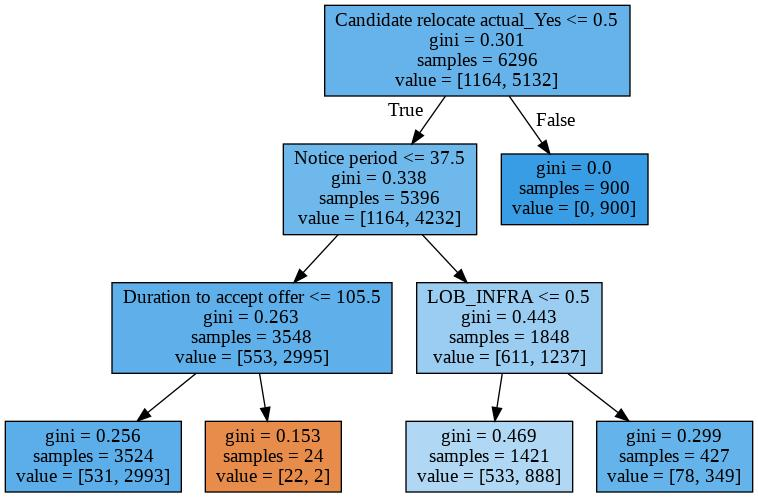

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

export_graphviz(clf_tree,out_file='chd_tree.odt',
                feature_names = X_train.columns,
                filled = True)
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree.odt')
chd_tree_graph.write_jpg('chd_tree.png')
Image(filename='chd_tree.png')